<h1>Pastebin Webscraping: Large Sample Analysis</h1>

<h2>Importing libraries</h2>

In [215]:
import mysql.connector
import getpass

In [216]:
pswd = getpass.getpass('Password:')

Password:········


<h2>Downloading Sample, Create DataFrame</h2>

In [232]:
try:
    cnx = mysql.connector.connect(host="aintnodatabase.c3hfm1hvxqhx.eu-west-2.rds.amazonaws.com",port=3306,database="pastebin",user="root",password=pswd)
    cursor = cnx.cursor(buffered=True)
    cursor.execute("SELECT * FROM pastebinsample")
    result = cursor.fetchall()
except mysql.connector.Error as err:
    print(str(err))
else:
    cursor.close()
    cnx.close()

In [234]:
import numpy as np
import pandas as pd

pastebin = pd.DataFrame(result,columns = ['link','hex content raw','hex content'])
pastebin['ascii content'] = pastebin['hex content'].apply(lambda x: x.decode("hex"))

<h2>Clustering</h2>

In [245]:
import collections
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

def cluster_texts(texts, clusters=3):
    """ Transform texts to Tf-Idf coordinates and cluster texts using K-Means """
    vectorizer = TfidfVectorizer(max_df=0.5,min_df=0.1)
 
    tfidf_model = vectorizer.fit_transform(texts)
    km_model = KMeans(n_clusters=clusters)
    km_model.fit(tfidf_model)
 
    clustering = collections.defaultdict(list)
 
    for idx, label in enumerate(km_model.labels_):
        clustering[label].append(idx)
 
    return clustering
 

articles = pastebin['ascii content']
clusters = cluster_texts(articles, clusters=5)

In [246]:
for i in range(len(clusters)):
    exec('clusters%s = []') % i
    for j in clusters[i]:
        for k in pastebin['ascii content'][j].split():
            exec("clusters%s.append(k)") % i

## Analysis

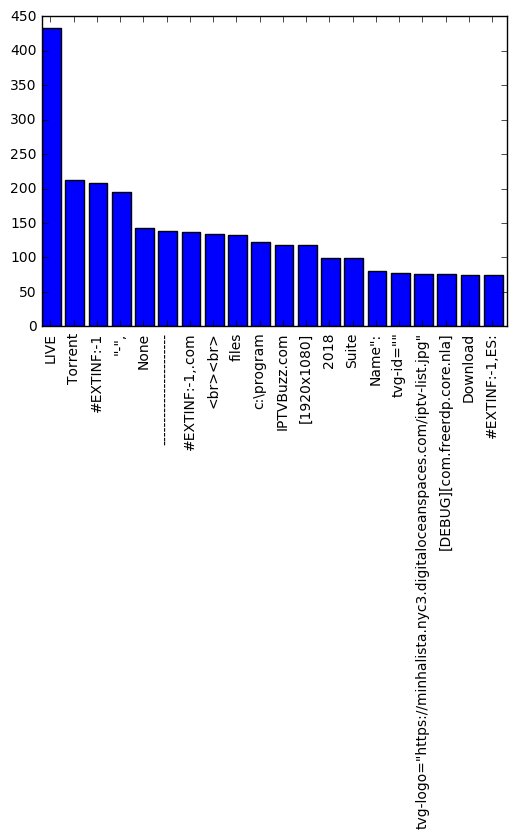

FROM jenkinsxio/builder-go:latest github.com/soundscapecloud/soundscape/internal/archiver github.com/soundscapecloud/soundscape/internal/logtailer go.uber.org/zap go.uber.org/zap/zapcore github.com/julienschmidt/httprouter golang.org/x/crypto/acme/autocert 


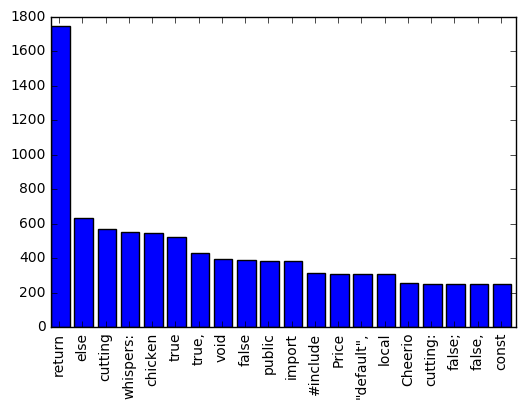

heavy-duty computational algorithmical kung-fu ahead! main(int argc, char *argv[]) printf("Hola, Mundo!"); Espanol, locos!!! return 


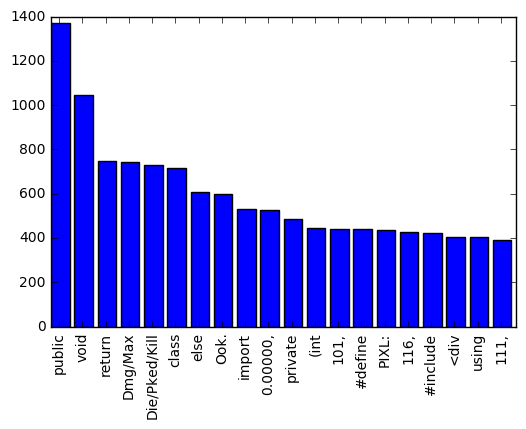

program 'wx-config' found following packages: libwxbase2.6-dbg (You enable component called 'universe') libwxbase2.6-dev (You enable component called 'universe') libwxbase2.8-dbg (You enable component called 'universe') libwxbase2.8-dev (You enable component called 'universe') libwxgtk2.6-dbg (You enable component called 'universe') libwxgtk2.6-dev (You enable component called 'universe') libwxgtk2.8-dbg (You enable component called 'universe') libwxgtk2.8-dev (You enable component called 'universe') 


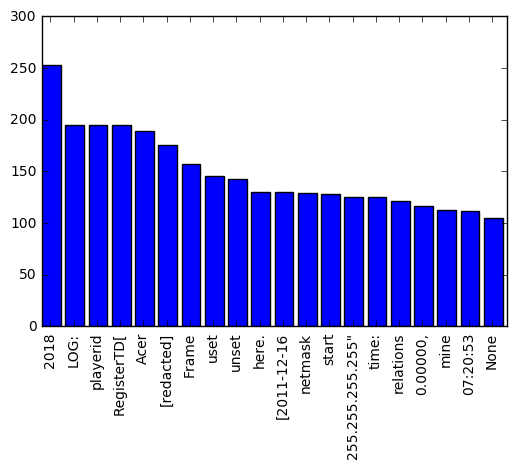

RegisterTD[ playerid CreatePlayerTextDraw(playerid, 662.000000, -17.000000, "_"); PlayerTextDrawBackgroundColor(playerid, RegisterTD[ playerid 255); PlayerTextDrawFont(playerid, RegisterTD[ playerid PlayerTextDrawLetterSize(playerid, RegisterTD[ playerid 0.600000, 55.700004); PlayerTextDrawColor(playerid, RegisterTD[ playerid 578870783); PlayerTextDrawSetOutline(playerid, RegisterTD[ playerid PlayerTextDrawSetProportional(playerid, RegisterTD[ playerid PlayerTextDrawSetShadow(playerid, RegisterTD[ playerid PlayerTextDrawUseBox(playerid, RegisterTD[ playerid PlayerTextDrawBoxColor(playerid, RegisterTD[ playerid 578870783); PlayerTextDrawTextSize(playerid, RegisterTD[ playerid -56.000000, 0.000000); PlayerTextDrawSetSelectable(playerid, RegisterTD[ playerid RegisterTD[ playerid CreatePlayerTextDraw(playerid, 662.000000, 107.000000, "_"); PlayerTextDrawBackgroundColor(playerid, RegisterTD[ playerid 255); PlayerTextDrawFont(playerid, RegisterTD[ playerid PlayerTextDrawLetterSize(playerid, 

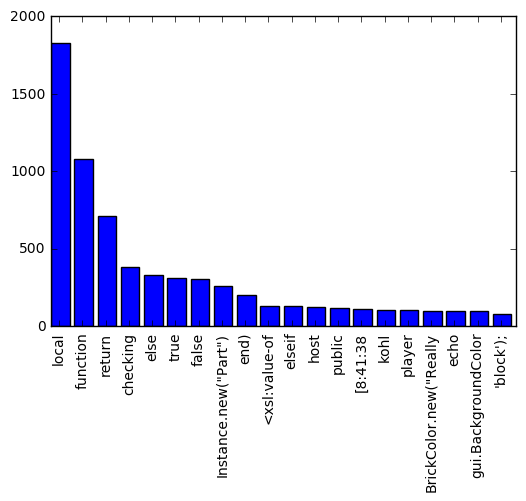

public function create(Request $request, $law) return $law->create([ 'parent_id' request('parent_id'), 'law_type_id' request('law_type_id'), 


In [248]:
import matplotlib.pyplot as plt
from random import randint

for i in range(len(clusters)):
    exec("counts = dict(collections.Counter(clusters%s).most_common(20))") % i
    labels, values = zip(*counts.items())

    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35

    plt.bar(indexes, values)

    # add labels
    plt.xticks(indexes + bar_width, labels, rotation='vertical')
    plt.show()
    exec("print(pastebin['ascii content'][clusters[%s][randint(0,len(clusters[%s])-1)]])") % (i,i)

In [ ]:
All_words = ""
All_words_list = []

for a in pastebin['ascii content']:
    All_words += a

In [62]:
from flask import Flask, make_response

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from wordcloud import WordCloud
import StringIO



In [44]:
app = Flask(__name__)

@app.route('/pastebinwordcloud.png')
def workskills():
    fig = Figure(figsize=(15,15))
    axis = fig.add_subplot(1, 1, 1)
    wordcloud = WordCloud(background_color="white", width=500, height=500, max_words=300, relative_scaling=.9, prefer_horizontal=.7, collocations=False).generate(All_words)
    axis.imshow(wordcloud, interpolation='bilinear')
    axis.set_title("Pastebin", size=100, y=1.02, fontweight='bold')
    axis.set_axis_off()

    canvas = FigureCanvas(fig)
    output = StringIO.StringIO()
    canvas.print_png(output)
    response = make_response(output.getvalue())
    response.mimetype = 'image/png'

    return response

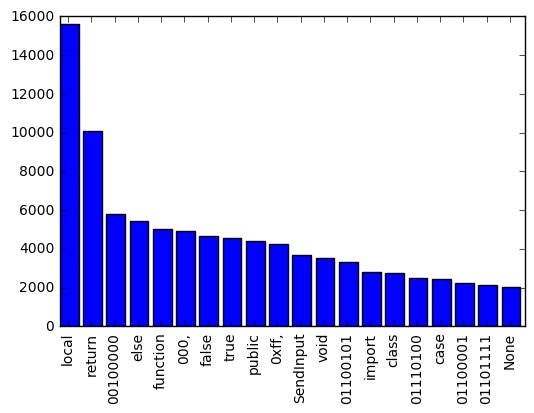

In [19]:
if __name__ == '__main__':
    app.run(host= '0.0.0.0')

 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [02/May/2018 15:40:01] "GET /pastebinwordcloud.png HTTP/1.1" 200 -


<h2>Running the Webscraping</h2>

Note, you can't re run the code below in a single session for one reason or another, so you need to restart the kernel between runs.

This code creates a lightweight container for our webspider and then runs it - to be honest understanding this is probably optional unless it breaks.